# Analyze Life Expectancy Data 

## Project Description
The goal of the project is to analyze data, find key features affecting life expectancy and create a model to predict
life expectancy

## Goals: 

   - find key features affecting life expectancy
   - find features relation with life expectancy
   - create a model to predict life expectancy
   - provide recommendations to raise life expectancy

In [1]:
# imports 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import wrangle as w
import modeling as m

import warnings
warnings.filterwarnings("ignore")

seed = 42

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Acquire

- Acquired data from  databank.worldbank.org and WHO website.
- It contained 1808 rows and 15 columns. 
- Each row represents a country in a certain year
- Each column represents a feaures of a country.


In [2]:
# acquire data using a function from wrangle module
df = w. acquire_data()

# peak into data
df.head()

,country,year,life_expectancy,life_expectancey_male,life_expectancey_female,infant_deaths,under_five_deaths,traffic_deaths,diphtheria,hepatitis_B,measles,population,GDP,percentage_expenditure,income_group
0,Afghanistan,2020.0,62.575,59.866,65.432,45,58,..,70,70,66,38972230.0,516.866552182696,15.53,Low income
1,Afghanistan,2019.0,63.565,60.619,66.677,46.4,60.1,15.9,72,72,64,37769499.0,500.522664145294,14.83,Low income
2,Afghanistan,2018.0,63.081,59.923,66.458,47.9,62.3,14.2,72,72,71,36686784.0,502.056770622973,14.21,Low income
3,Afghanistan,2017.0,63.016,60.105,66.099,49.5,64.8,15.1,66,66,67,35643418.0,530.149830802984,12.62,Low income
4,Afghanistan,2016.0,63.136,61.193,65.096,51.3,67.5,14.8,66,66,64,34636207.0,520.252064031151,11.82,Low income


## Prepare

#### Prepare Actions:

- Rename column names
- Drop unwanted columns
- Merge dataframes
- Checked for Nulls, fill Nulls using forward fill and back fill
- Split data into train, validate and test (approx. 56/24/20)

In [3]:
# acquire data,clean data, and split data using a function from wrangle module
train, validate, test = w.wrangle_data()

# get rows and columns of data
train.shape, validate.shape, test.shape

((973, 19), (417, 19), (348, 19))

## Explore

### Does countries income determine life expectancy?

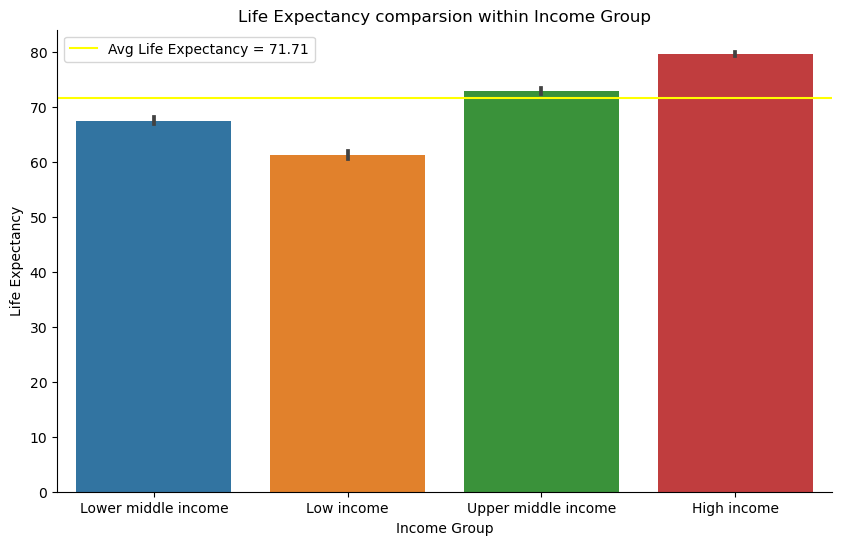

In [4]:
m.viz_barplot(train)

<div class="alert alert-block alert-warning">
<b>TakeAways:</b> 
    
From graph, we can see that countries with low income have lower life expecatncy than countires with high income.
</div>


### Does infant deaths occur more in low income countries?

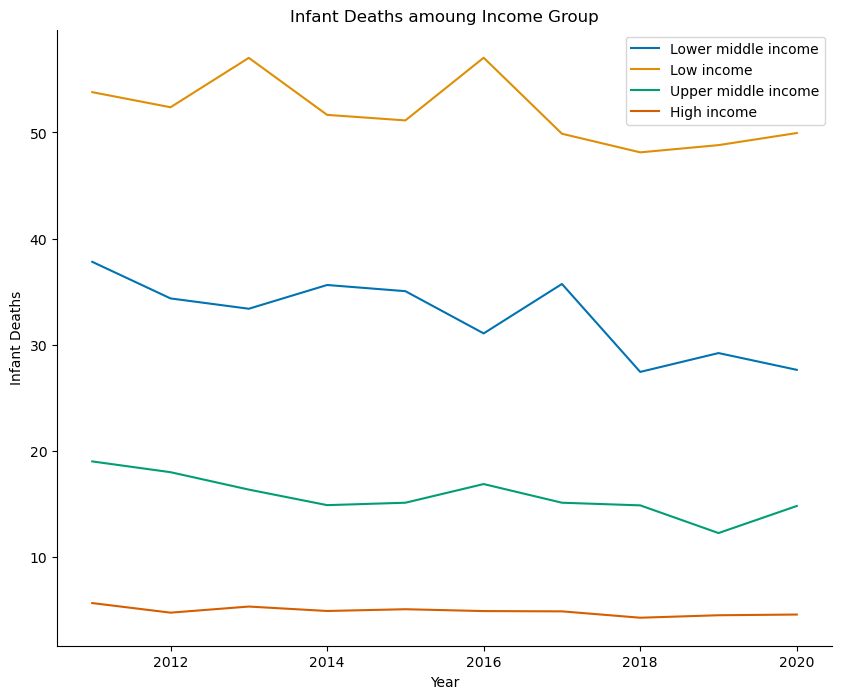

In [5]:
m.viz_lineplot(train)

<div class="alert alert-block alert-warning">
<b>TakeAways:</b> 
    
From graph, we can see that infant deaths has decreased over 2011-2020 amoung all income group countries. Super rich  countries have lowest infant deaths and its trend is flat. Poor countries have spikes on infant deaths on certain years. Upper middle income countries  infant deaths spiked on around 2019 and 2020 while other countires have steady trends.


### Immunization relations with death of under five old

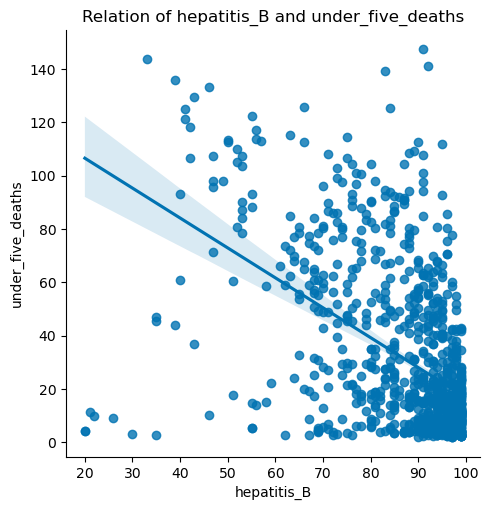

In [6]:
m.viz_lmplot(train, 'hepatitis_B', 'under_five_deaths')

In [7]:
m.pearson_test(train,'hepatitis_B','under_five_deaths')

p is 0.0000000000, -0.4991485345547424
The pearson r test shows that there is a relationship.


<div class="alert alert-block alert-warning">
<b>TakeAways:</b> 
    
From graph, we can see that immunizaiton of hepatits B and death of under five have negtive relationship.
    
Pearson r test shows that there is negative relationship between immunizaiton of hepatitis B and death of childern under five.


### What is the relationship of percentage of expenditure and life expectancy?

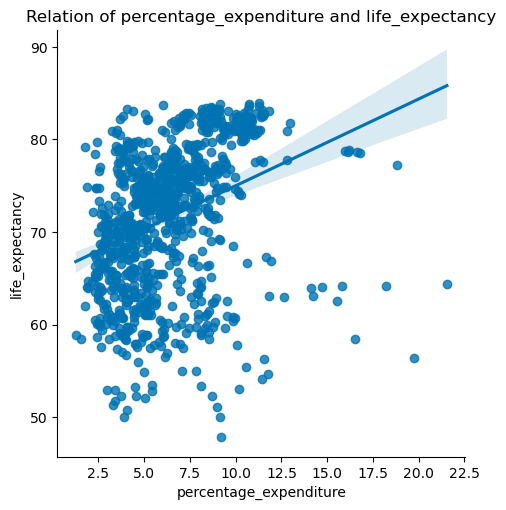

In [8]:
m.viz_lmplot(train, 'percentage_expenditure', 'life_expectancy')

In [9]:
m.pearson_test(train,'percentage_expenditure','life_expectancy')

p is 0.0000000000, 0.3325907793780053
The pearson r test shows that there is a relationship.


<div class="alert alert-block alert-warning">
<b>TakeAways:</b> 
    
From graph, we can see that higher percentage of expediture of GDP on health  has 
positive correlation with life expectancy.
    
Pearson r test shows that there is a significant positive relationship.

### What is the relation of GDP and life expectancy?

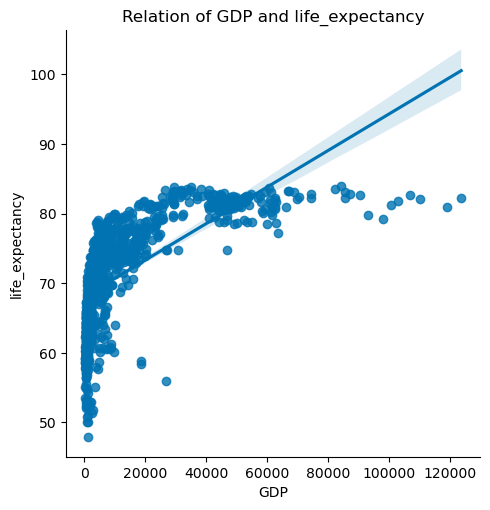

In [10]:
m.viz_lmplot(train, 'GDP', 'life_expectancy')

In [11]:
m.pearson_test(train,'GDP','life_expectancy')

p is 0.0000000000, 0.6450357586557457
The pearson r test shows that there is a relationship.


<div class="alert alert-block alert-warning">
<b>TakeAways:</b> 
    
From graph, we can see that GDP and life expectancy has positive correlationship.
    
Pearson r test shows that there is a significant positive relationship.

### Exploration Summary:
- GDP, immunizations, percentage expendiutre on health have positive coorelation with life expectancy.
- Infant deaths, deaths of under five, traffice death have negative correlation with life expectancy.
- Poor countries have life expenctancy below average life expectancy of 71.71 whereas rich coutries have higher life expectancy and above average life expectancy.
- Poor countries have higher infant deaths. 
- I will use GDP, immunizations, percentage expendiutrenfant, deaths, deaths of under five, traffice death for model features as all of them have a significant realtionship with life expectancy.

### Scale Data:
- I used MinMax Scaler to scale data.


In [12]:
train_scaled, validate_scaled, test_scaled= m.scale_data(train, validate, test, 
                                                       columns_to_scale=['life_expectancey_male','life_expectancey_female', 'infant_deaths', 
                                 'under_five_deaths','traffic_deaths', 'diphtheria', 'hepatitis_B', 
                                 'measles', 'population','GDP', 'percentage_expenditure', 
                                 'High income','Low income', 'Lower middle income', 'Upper middle income']
                                                         ,return_scaler=False)

## Modeling

- I will use train data and validate data on different models to get the model that performs the best.Then, I will use the test data on the best model to get predicitons.
- I will use my baseline RMSE as my evaluation metric.
- I will use following four modelsto get the best model:
    - Model 1: Linear Regression(OLS)
    - Model 2: LASSOLARS
    - Model 3: TweedieRegressor
    - Model 4: Polynomial Regression

In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test = m.X_y_split(train_scaled, validate_scaled, test_scaled, 'life_expectancy')

### Baseline RMSE

In [14]:
# get RMSE on train and validate data using mean from function of modelling module
m.print_rmse_baseline(train,validate,'life_expectancy')

RMSE using mean: 
train_RMSE: 7.700198332689784
validate RMSE: 7.866369962044724


In [15]:
rmse_df= m.rmse_models(X_train,y_train,X_validate,y_validate,train, validate, 'life_expectancy')
rmse_df

,train_RMSE,validate_RMSE,difference
baseline,7.700198,7.86637,-0.166172
LinearRegreesion,2.310000,2.69000,-0.380000
LassoLars(alpha=1),5.360000,5.55000,-0.190000
"TweedieRegreesor(power=1, alpha=0)",2.270000,2.64000,-0.370000
Polynomial Regression(degree=3),2.310000,2.69000,-0.380000


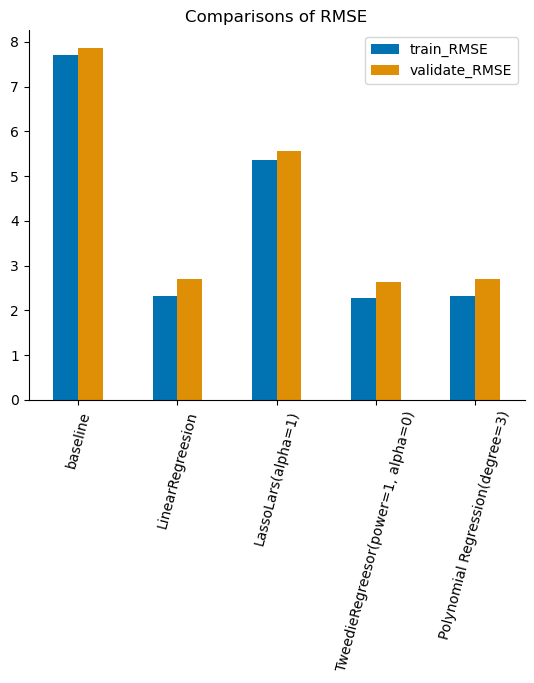

In [16]:
m.plot_rmse(rmse_df)

### Model Evaluation

In [17]:
m.tweedie_test(X_train, y_train, X_test, y_test, 'life_expectancy', 1, 0)

Using tweedie on test
RMSE : 2.43
r2 : 0.9200933643847337


### Modelling summary
- All models perfomed better than baseline on train and validat data.
- All models perfomed worse on validate to train
- Tweedie Regression with power 1 and alpha 0 performed better than other models and I am going to use it for test data.


## Conclusions 

- GDP, immunizations, percentage expendiutre on health have positive coorelation with life expectancy.
- Infant deaths, deaths of under five, traffice death have negative correlation with life expectancy.
- Poor countries have life expenctancy below average life expectancy of 71.71 whereas rich coutries have higher life expectancy and above average life expectancy.
- Poor countries have higher infant deaths.
- All models perfomed better than baseline on train and validat data.
- All models perfomed worse on validate to train
- Tweedie Regression with power 1 and alpha 0 performed better than other models and I am going to use it for test data.

###  Recommendations and Next Steps
 - recommend low income countries to run program to decrease infant deaths. There is higher number of  infant deaths. 
 - recommend to increase in expenses to health to rise life expectancy.
 
 - I will exlpore further by countries' location to see if geography and temparature affect life expectancy.